In [570]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [571]:
pd.read_csv('./dfs/precios_cierre.csv').head(5)

,No,Fecha,Apertura,Máximo,Mínimo,Cierre,Cierre Ajus,Volumen,Unnamed: 8,Unnamed: 9
0,1,31/01/2017,47131.23,47243.07,46928.48,47001.06,47001.06,215251100,NaN,NaN
1,2,01/02/2017,47001.97,47225.23,46780.03,47009.51,47009.51,170788000,NaN,NaN
2,3,02/02/2017,47019.85,47111.78,46909.31,47095.07,47095.07,205641600,NaN,NaN
3,4,03/02/2017,47097.51,47228.65,46801.77,47225.10,47225.10,249033100,NaN,NaN
4,5,07/02/2017,47228.04,47258.29,46614.38,46728.95,46728.95,301439900,NaN,NaN


In [572]:
cierre = pd.read_csv('./dfs/precios_cierre.csv', parse_dates = ['Fecha'], dayfirst = True )
# nota: siempre revisar el tipo de dato
cierre.info()
cierre.head()

cierre = cierre[['Fecha', 'Cierre']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           252 non-null    int64         
 1   Fecha        252 non-null    datetime64[ns]
 2   Apertura     252 non-null    float64       
 3   Máximo       252 non-null    float64       
 4   Mínimo       252 non-null    float64       
 5   Cierre       252 non-null    float64       
 6   Cierre Ajus  252 non-null    float64       
 7   Volumen      252 non-null    object        
 8   Unnamed: 8   0 non-null      float64       
 9   Unnamed: 9   1 non-null      object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 19.8+ KB


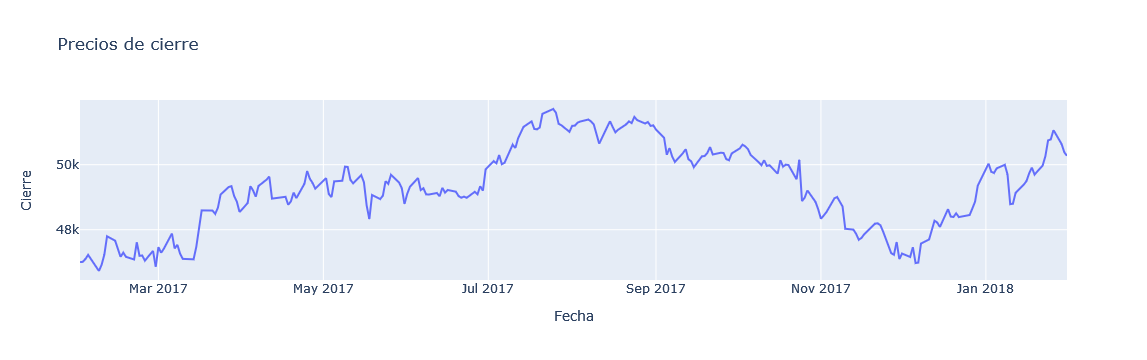

In [573]:
# graficando la serie original
fig = px.line(cierre, x = "Fecha", y = "Cierre", title = 'Precios de cierre')
fig.show()

# Suavizamiento por Medias Moviles

In [574]:
cierre['MA_2']  = cierre['Cierre'].rolling(window = 2).mean().shift()
cierre['MA_5']  = cierre['Cierre'].rolling(window = 5).mean().shift()
# el shift es para poner el promedio de los n anteriores, en el renglon n+1

In [575]:
cierre.head(7)

,Fecha,Cierre,MA_2,MA_5
0,2017-01-31,47001.06,NaN,NaN
1,2017-02-01,47009.51,NaN,NaN
2,2017-02-02,47095.07,47005.285,NaN
3,2017-02-03,47225.10,47052.290,NaN
4,2017-02-07,46728.95,47160.085,NaN
5,2017-02-08,46921.71,46977.025,47011.938
6,2017-02-09,47232.17,46825.330,46996.068


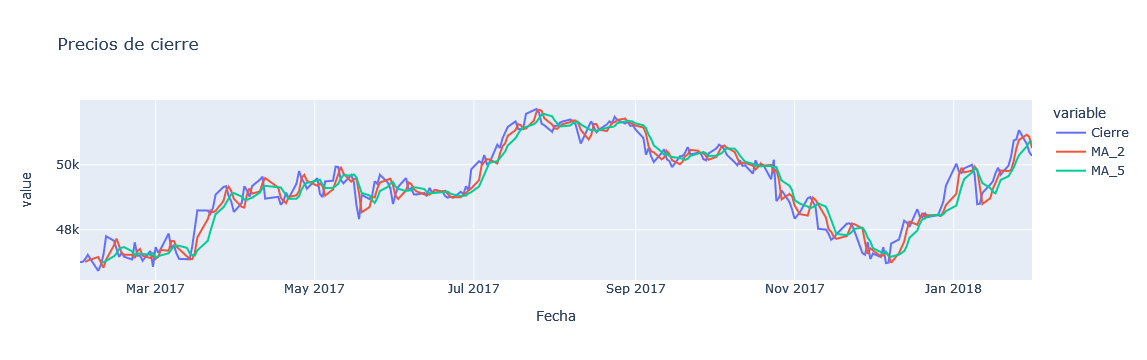

In [576]:
fig = px.line(cierre, x = "Fecha", y = ["Cierre", 'MA_2', 'MA_5'], title = 'Precios de cierre')
fig.show()

Como podemos observar, hasta ahora solo hemos visto, las "predicciones" hasta tiempo **t**, para cerlas en tiempo **t+1** tenemos que agregar un renglon

In [577]:
# cierre.iloc[len(cierre)-1] me coloca en el penultimo registro
# cierre.iloc[len(cierre)-1][0] una vez ahí, me coloco en la posicion de la fecha
# en ese caso es la posicion cero
# le sumo un día a la fecha anterior y con eso puedo tener la prediccion al tiempo t+1
# las demás comas con cero son para rellenar de ceros las columnas restantes
# el nan se agrega en el cierre para no estropear la grafica

cierre.loc[len(cierre)] = [cierre.iloc[len(cierre)-1][0] + timedelta(1) , None, 0, 0]

In [578]:
cierre.tail()

,Fecha,Cierre,MA_2,MA_5
248,2018-01-26,51065.49,50762.415,50291.024
249,2018-01-29,50636.32,50921.695,50565.010
250,2018-01-30,50382.86,50850.905,50697.378
251,2018-01-31,50270.04,50509.590,50721.900
252,2018-02-01,NaN,0.000,0.000


In [579]:
cierre['MA_2']  = cierre['Cierre'].rolling(window = 2).mean().shift()
cierre['MA_5']  = cierre['Cierre'].rolling(window = 5).mean().shift()

In [580]:
cierre.tail(10)

,Fecha,Cierre,MA_2,MA_5
243,2018-01-19,49695.56,49822.135,49531.836
244,2018-01-22,49974.48,49803.765,49643.766
245,2018-01-23,50260.25,49835.020,49761.206
246,2018-01-24,50746.93,50117.365,49914.912
247,2018-01-25,50777.90,50503.590,50117.838
248,2018-01-26,51065.49,50762.415,50291.024
249,2018-01-29,50636.32,50921.695,50565.010
250,2018-01-30,50382.86,50850.905,50697.378
251,2018-01-31,50270.04,50509.590,50721.900
252,2018-02-01,NaN,50326.450,50626.522


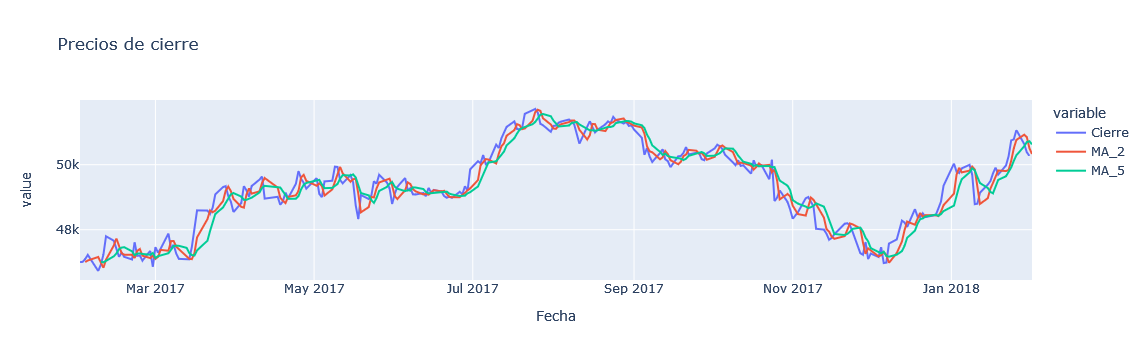

In [581]:
fig = px.line(cierre, x = "Fecha", y = ["Cierre", 'MA_2', 'MA_5'], title = 'Precios de cierre')
fig.show()

**_NOTA:_** Por la defición de promedio, este método solo permite "predecir" un periodo en _t+1_ pues al querer predecir el el tiempo _t+2_ ya tenemos _n-1_ datos para hacer el promedio de predicción, y hacerlo rellenando con ceros no es correcto, pues ponderaría de manera erronea la prediccion 

# Suavizamiento Exponencial simple

$$ \hat{Y}_{t+1} = \alpha Y_{t}+(1 - \alpha) \hat{Y}_t $$

Este suavizamiento es una ponderacion del valor en de la serie en el tiempo anterior, más una ponderacion del valor simulado en el tiempo anterior, como se puede observar esta formula es recursiva, para inicializar los valores, la estimacion $ \hat{Y} = Y $, es decir, la primer estimacion es igual al primer valor de la serie

In [582]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [583]:
alpha = 0.4
#nota: el ajuste se hace con los datos de cierre, hasta donde existen, y como la ultima entrada del cierre 
# es un na por eso hacemos el slicing hasta el ultimo dato
exp_simp = SimpleExpSmoothing(cierre['Cierre'][:-1]).fit(smoothing_level = alpha, optimized = False)
#el parametro optimized = True calcula el mejor parametro para este ajuste
#exp_simp = SimpleExpSmoothing(cierre['Cierre']).fit(optimized = True)

#creamos una nueva columna
cierre['Exp_simp'] = exp_simp.fittedvalues

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



In [584]:
cierre.tail(2)

,Fecha,Cierre,MA_2,MA_5,Exp_simp
251,2018-01-31,50270.04,50509.59,50721.900,50563.780082
252,2018-02-01,NaN,50326.45,50626.522,NaN


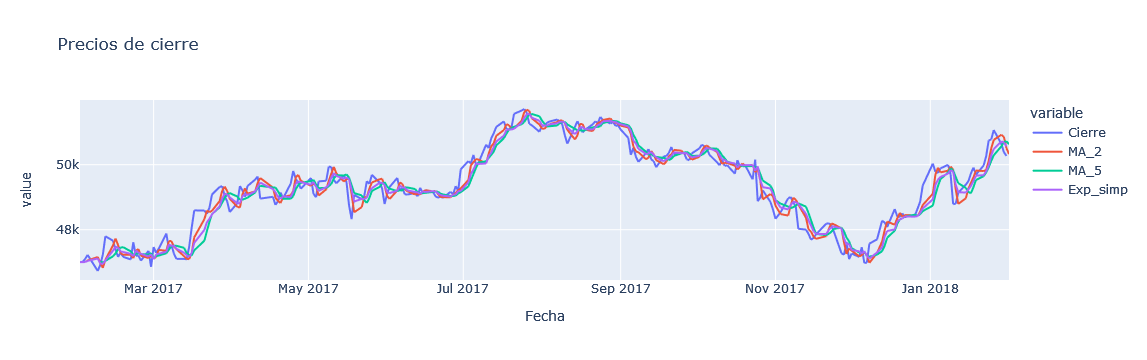

In [585]:
fig = px.line(cierre, x = "Fecha", y = ["Cierre", 'MA_2', 'MA_5', 'Exp_simp'], title = 'Precios de cierre')
fig.show()

##### Para calcular el error, hacemos lo siguiente

In [586]:
#calcular el error 
from sklearn.metrics import mean_squared_error as MSE

In [587]:
#valor real de la serie
y_t = cierre['Cierre']

#valores estimados con medias moviles
y_ma_5 = cierre['MA_5']

#valores estimados con suavizamiento exp
y_exp_s = cierre['Exp_simp']

In [588]:
#MSE
# dado que no tenemos la misma cantidad de datos en la serie real 
# y la estimacion con ma, tenemos que truncar los datos
# en y_t empieza del 5 al final porque la media movil de 5 no tiene los primeros 5 datos
mse_ma_5 = MSE(y_t.dropna()[5:], y_ma_5.dropna()[:-1])
print(f'El error cuadratico medio de la media movil(5): {mse_ma_5}')

mse_exp_s = MSE(y_t.dropna(), y_exp_s.dropna())
print(f'El error cuadratico medio del suav exp simple: {mse_exp_s}')

El error cuadratico medio de la media movil(5): 165196.0318010687
El error cuadratico medio del suav exp simple: 118223.39342676144


In [589]:
# dado que pusimos en automatico el parametro alpha a optimizar
# para conocer su valor lo hacemos con un summary al modelo
exp_simp.summary()

Dep. Variable:,Cierre,No. Observations:,252
Model:,SimpleExpSmoothing,SSE,29792295.144
Optimized:,False,AIC,2947.443
Trend:,None,BIC,2954.502
Seasonal:,None,AICC,2947.605
Seasonal Periods:,None,Date:,"Mon, 18 Apr 2022"
Box-Cox:,False,Time:,19:44:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4000000,alpha,False
initial_level,47001.060,l.0,False


Se puede observar que el parametro alpha es el smoothing_level de 0.00500 y el algoritmo se inicializó en un valos de 47001.060

In [590]:
# otra forma de conocer nuestros parametos 
exp_simp.params_formatted

,name,param,optimized
smoothing_level,alpha,0.40,False
initial_level,l.0,47001.06,False


##### Prediccion con el suavizamiento exponencial simple

In [591]:
# prediccion de 5 periodos
preds = exp_simp.forecast(5)
preds

252    50446.284049
253    50446.284049
254    50446.284049
255    50446.284049
256    50446.284049
dtype: float64

##### Nota: Las predicciones con este suavizamiento siempre son las mismas debido a la naturaleza de la formula del suavizamiento, e spor eso que para todos los pronosticos nos da un valor constante

In [592]:
cierre_exp_simpl = cierre[['Fecha', 'Cierre', 'Exp_simp']]
cierre_exp_simpl.dropna(inplace = True)
pass

<ipython-input-592-26dcb1b7c612>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [593]:
cierre_exp_simpl.tail(7)

,Fecha,Cierre,Exp_simp
245,2018-01-23,50260.25,49795.578153
246,2018-01-24,50746.93,49981.446892
247,2018-01-25,50777.90,50287.640135
248,2018-01-26,51065.49,50483.744081
249,2018-01-29,50636.32,50716.442449
250,2018-01-30,50382.86,50684.393469
251,2018-01-31,50270.04,50563.780082


In [594]:
#llenamos las predicciones en el df de cierre tantas veces como predicciones hayamos hecho
long_df = len(cierre_exp_simpl)
for i in range(len(preds)):
# este for llenara las "predicciones" del suavicamiento exponencial simple
# donde haya un none, es solo rellenar con NA's el data frame para no estropear el gráfico
    cierre_exp_simpl.loc[len(cierre_exp_simpl)] = [cierre_exp_simpl.iloc[len(cierre_exp_simpl) - 1][0] + timedelta(1) , None, preds[long_df + i]]

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



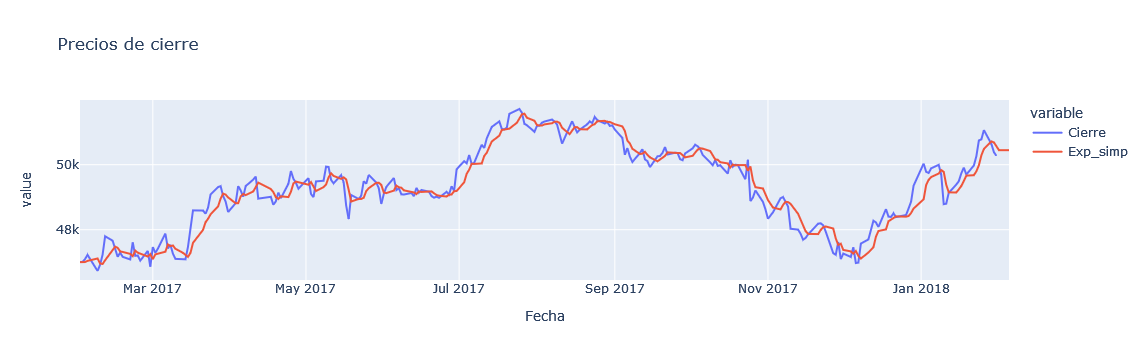

In [595]:
fig = px.line(cierre_exp_simpl, x = "Fecha", y = ["Cierre", 'Exp_simp'], title = 'Precios de cierre')
fig.show()

In [596]:
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse

print('MSE:  ', mse(cierre_exp_simpl['Cierre'].dropna(), cierre_exp_simpl['Exp_simp'][:-5]) )
print('MAPE: ', (mape(cierre_exp_simpl['Cierre'].dropna(), cierre_exp_simpl['Exp_simp'][:-5])) * 100, '%' )

MSE:   118223.39342676144
MAPE:  0.537013358038616 %


# Suavizamiento Exponencial doble, suavizamiento de Holt

$$ \hat{Y}_{t+p} = L_{t} + pT_{t} $$
donde: p es el numero de periodos a pronosticar
$$T_{t} = \beta * (L_{t} - L_{t-1}) + (1 - \beta) * (T_{t-1}) $$
dado que el calculo de $T_t$ es recursivo, el primer valor, es decir, $T_0 = 0$
$$ L_{t} = \alpha * Y_{t} + (1-\alpha) * (L_{t-1} + T_{t-1}) $$
como podemos observar, el calculo de $L_{t}$ también es recursivo, en este caso, el valor de $L_0 = Y_0$ es decir, $L_0$ se inicializa con el valor de la serie observada

en este suavizamiento se tienen 2 constantes que modifican a la serie, El factor $L_t$ representa una especie de suavizamiento simple y el "doble suavizamiento" $T_t$ representa una especie de pendiente  de la serie 

In [597]:
from statsmodels.tsa.api import Holt

In [598]:
cierre.tail()

,Fecha,Cierre,MA_2,MA_5,Exp_simp
248,2018-01-26,51065.49,50762.415,50291.024,50483.744081
249,2018-01-29,50636.32,50921.695,50565.010,50716.442449
250,2018-01-30,50382.86,50850.905,50697.378,50684.393469
251,2018-01-31,50270.04,50509.590,50721.900,50563.780082
252,2018-02-01,NaN,50326.450,50626.522,NaN


In [599]:
alpha = 0.9
beta  = 0.1
mod_holt = Holt(cierre['Cierre'][:-1]).fit(smoothing_level = alpha, smoothing_trend = 0.1, optimized = False)
cierre['holt'] = mod_holt.fittedvalues

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



In [600]:
cierre.tail()

,Fecha,Cierre,MA_2,MA_5,Exp_simp,holt
248,2018-01-26,51065.49,50762.415,50291.024,50483.744081,50905.179613
249,2018-01-29,50636.32,50921.695,50565.010,50716.442449,51185.806778
250,2018-01-30,50382.86,50850.905,50697.378,50684.393469,50778.162685
251,2018-01-31,50270.04,50509.590,50721.900,50563.780082,50473.707034
252,2018-02-01,NaN,50326.450,50626.522,NaN,NaN


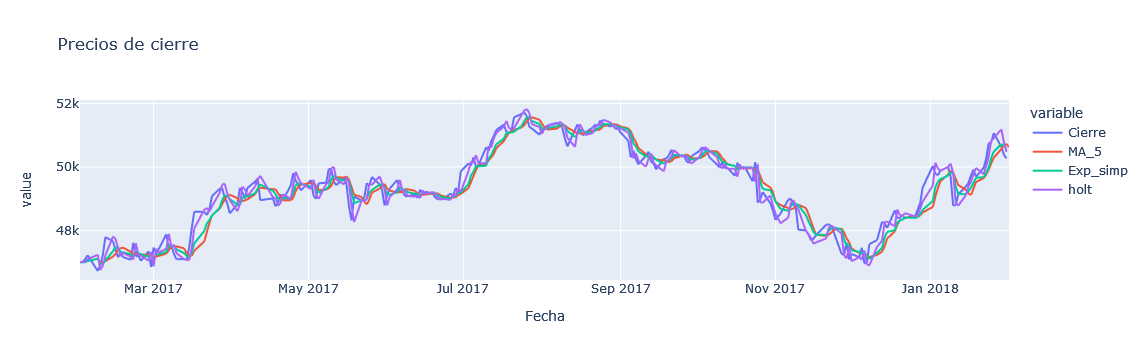

In [601]:
fig = px.line(cierre, x = "Fecha", y = ["Cierre",'MA_5', 'Exp_simp', 'holt'], title = 'Precios de cierre')
fig.show()

In [602]:
pred = mod_holt.forecast(5)
pred

252    50323.393435
253    50356.380168
254    50389.366900
255    50422.353632
256    50455.340364
dtype: float64

Este método a diferencia del anterior las predicciones ya no son constantes, pero se queda con la tendencia (signo) del ultimo cambio entre las ventas, si el ultimo cambio fue positivo las predicciones tendrán tendencia a la alta 

In [603]:
mod_holt.params_formatted

,name,param,optimized
smoothing_level,alpha,0.90,False
smoothing_trend,beta,0.10,False
initial_level,l.0,47001.06,False
initial_trend,b.0,8.45,False


In [604]:
cierre_holt = cierre[['Fecha', 'Cierre', 'holt']]
cierre_holt.dropna(inplace = True)

<ipython-input-604-eb121142fbb5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [605]:
cierre_holt.tail(12)

,Fecha,Cierre,holt
240,2018-01-16,49491.72,49393.488728
241,2018-01-17,49732.30,49524.703876
242,2018-01-18,49911.97,49773.031042
243,2018-01-19,49695.56,49972.071264
244,2018-01-22,49974.48,49772.320273
245,2018-01-23,50260.25,50021.567549
246,2018-01-24,50746.93,50325.166697
247,2018-01-25,50777.90,50831.497309
248,2018-01-26,51065.49,50905.179613
249,2018-01-29,50636.32,51185.806778


In [606]:
#llenamos las predicciones en el df de cierre tantas veces como predicciones hayamos hecho
long_df = len(cierre_holt)
for i in range(len(preds)):
# este for llenara las "predicciones" del suavicamiento exponencial simple
# donde haya un none, es solo rellenar con NA's el data frame para no estropear el gráfico
    cierre_holt.loc[len(cierre_holt)] = [cierre_holt.iloc[len(cierre_holt) - 1][0] + timedelta(1) , None, pred[long_df + i]]

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



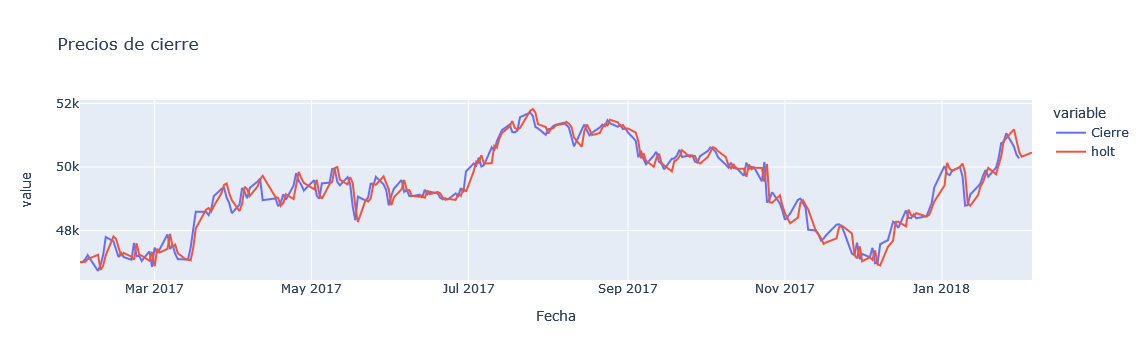

In [607]:
fig = px.line(cierre_holt, x = "Fecha", y = ["Cierre", 'holt'], title = 'Precios de cierre')
fig.show()

Este método a diferencia del anterior las predicciones ya no son constantes, pero se queda con la tendencia (signo) del ultimo cambio entre las ventas, si el ultimo cambio fue positivo las predicciones tendrán tendencia a la alta. Algo que debemos notar es que le metodo de Holt "agarra" pero no estacionariedades.

In [608]:
print('MSE:  ', mse(cierre_holt['Cierre'].dropna(), cierre_holt['holt'][:-5]) )
print('MAPE: ', (mape(cierre_holt['Cierre'].dropna(), cierre_holt['holt'][:-5])) * 100, '%' )

MSE:   90892.43926859112
MAPE:  0.4720642328132543 %


Comparemos holt vs el simple

In [609]:
print('Metricas usando Holt')
print('MSE:  ', mse(cierre_holt['Cierre'].dropna(), cierre_holt['holt'][:-5]) )
print('MAPE: ', (mape(cierre_holt['Cierre'].dropna(), cierre_holt['holt'][:-5])) * 100, '%' )
print('-------------------------------------')
print('Metricas usando suavizamiento simple')
print('MSE:  ', mse(cierre_exp_simpl['Cierre'].dropna(), cierre_exp_simpl['Exp_simp'][:-5]) )
print('MAPE: ', (mape(cierre_exp_simpl['Cierre'].dropna(), cierre_exp_simpl['Exp_simp'][:-5])) * 100, '%' )

Metricas usando Holt
MSE:   90892.43926859112
MAPE:  0.4720642328132543 %
-------------------------------------
Metricas usando suavizamiento simple
MSE:   118223.39342676144
MAPE:  0.537013358038616 %


# Suavizamiento exponencial triple, Suavizamiento de Winter

$$ \hat{Y}_{t+p} = (L_{t}+pT_{t})S_{t-s+p} $$
donde "p" es el numero de periodos a pronsoticar
$$ S_{t} = \gamma * \frac{Y_{t}} { L_{t}} + (1 - \gamma) * S_{t-s}$$
el $S_{t-s}$ representa  lo del año pasado es decir, una estacioanriedad, notemas que esa de la ecuacion es recursiva, para el caluclo de los primeros *t-s* peridos donde *s = 0*, es decir, los primeros *t* valores de $S$ se calcularán como: $\frac{Y_i}{L_{t}}$, *i* corre de *0* a *t*
###### Nota: en este caso *t* representa el primer periodo donde empieza la prediccion no necesariamente en *t = 0* 

$$ T_{t} = \beta*(L_{t} - L_{t-1}) + ( 1 - \beta) * (T_{t-1}) $$  
Componente de tendencia suavizado, como $T_{t}$ también es recursivo, su primer valor, es decir *t* se calculo como el cociente del valor de la serie parado en ese punto entre el ultimo valor que se observa (de manera cronologica), por ejemplo, si estoy haciendo en periodo de 12 días, serie el valor de la serie $\frac{\hat{Y}_{12}}{\hat{Y}_{256}}$ suponiendo que mis periodos son de 12 días y mi ultima observación es la 256



$$ L_{t} = \alpha* \frac{Y_{t}}{S_{t-s}} + ( 1 - \alpha) * (L_{t-1} + T_{t-1}) $$ 
Representa un suavizamiento de la serie ponderado por la estacionariedad y por el mismo suavizamiento de de $L_{t}$ (recursividad), entonces el valor con el que se inicializa es con un promedio de la serie vista hasta el tiempo *t*, es decir, si lo hacemos con una estacionariedad de 7 días, pues el valor inicial $L_8$ se inicializa como el promedio de la serie de ventas de los primeros 7 días 


In [610]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

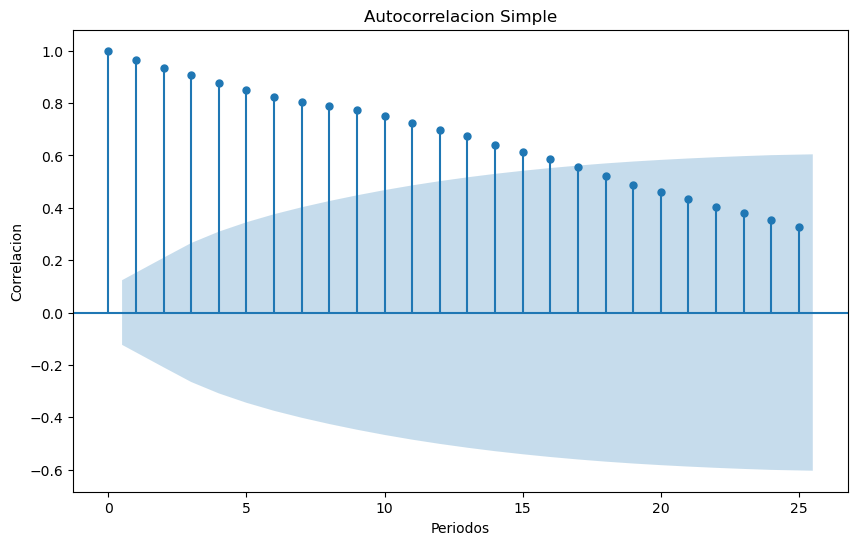

In [611]:
plt.rc('figure', figsize = (10, 6))

plot_acf(cierre['Cierre'].dropna().values, fft = 1)
plt.title('Autocorrelacion Simple')
plt.xlabel('Periodos')
plt.ylabel('Correlacion')

plt.show();

In [612]:
estacionariedad = 7

# el add en el trend y seasonal es porque vemos que en la serie de tiempo vemos que va creciendo

mod_winter = ExponentialSmoothing(cierre['Cierre'].dropna(), seasonal_periods = estacionariedad,
                                                             trend = 'add', seasonal = 'add').fit(optimized = True)

cierre['winter'] = mod_winter.fittedvalues

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [613]:
cierre.tail()

,Fecha,Cierre,MA_2,MA_5,Exp_simp,holt,winter
248,2018-01-26,51065.49,50762.415,50291.024,50483.744081,50905.179613,50839.069147
249,2018-01-29,50636.32,50921.695,50565.010,50716.442449,51185.806778,50954.443303
250,2018-01-30,50382.86,50850.905,50697.378,50684.393469,50778.162685,50664.527658
251,2018-01-31,50270.04,50509.590,50721.900,50563.780082,50473.707034,50664.409742
252,2018-02-01,NaN,50326.450,50626.522,NaN,NaN,NaN


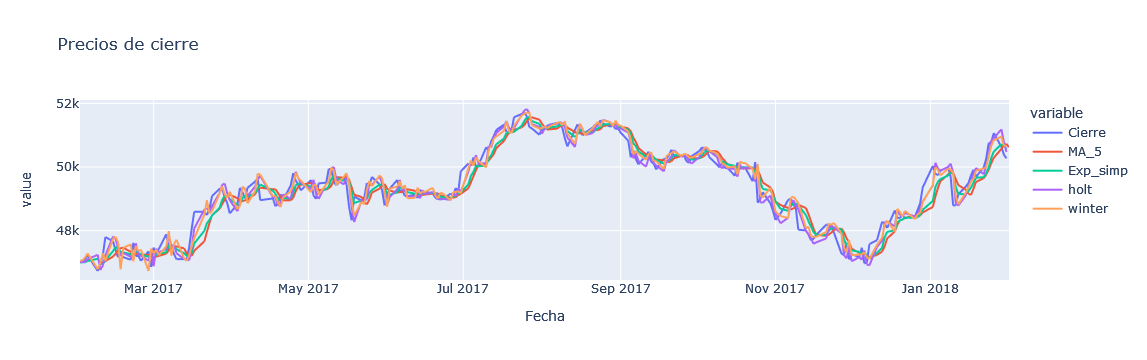

In [614]:
fig = px.line(cierre, x = "Fecha", y = ["Cierre",'MA_5', 'Exp_simp', 'holt', 'winter'], title = 'Precios de cierre')
fig.show()

In [615]:
cierre_winter = cierre[['Fecha', 'Cierre']].dropna()

In [616]:
cierre_winter['winter'] = mod_winter.fittedvalues

pred_win = mod_winter.forecast(5)

In [617]:
cierre_winter.tail(5)

,Fecha,Cierre,winter
247,2018-01-25,50777.90,50670.016743
248,2018-01-26,51065.49,50839.069147
249,2018-01-29,50636.32,50954.443303
250,2018-01-30,50382.86,50664.527658
251,2018-01-31,50270.04,50664.409742


In [618]:
mod_winter.params_formatted

,name,param,optimized
smoothing_level,alpha,0.853571,True
smoothing_trend,beta,0.000100,True
smoothing_seasonal,gamma,0.079870,True
initial_level,l.0,49323.003333,True
initial_trend,b.0,47.765510,True
initial_seasons.0,s.0,-2321.943333,True
initial_seasons.1,s.1,-2313.493333,True
initial_seasons.2,s.2,-2227.933333,True
initial_seasons.3,s.3,-2097.903333,True
initial_seasons.4,s.4,-2594.053333,True


In [619]:
long_df = len(cierre_winter)
for i in range(len(preds)):
# este for llenara las "predicciones" del suavicamiento exponencial simple
# donde haya un none, es solo rellenar con NA's el data frame para no estropear el gráfico
    cierre_winter.loc[len(cierre_winter)] = [cierre_winter.iloc[len(cierre_winter) - 1][0] + timedelta(1) , None, pred[long_df + i]]

In [620]:
cierre_winter.tail(6)

,Fecha,Cierre,winter
251,2018-01-31,50270.04,50664.409742
252,2018-02-01,NaN,50323.393435
253,2018-02-02,NaN,50356.380168
254,2018-02-03,NaN,50389.366900
255,2018-02-04,NaN,50422.353632
256,2018-02-05,NaN,50455.340364


Comparando los tres suavizamientos exponenciales

In [621]:
print('Metricas usando Holt')
print('MSE:  ', mse(cierre_holt['Cierre'].dropna(), cierre_holt['holt'][:-5]) )
print('MAPE: ', (mape(cierre_holt['Cierre'].dropna(), cierre_holt['holt'][:-5])) * 100, '%' )
print('-------------------------------------')
print('Metricas usando suavizamiento simple')
print('MSE:  ', mse(cierre_exp_simpl['Cierre'].dropna(), cierre_exp_simpl['Exp_simp'][:-5]) )
print('MAPE: ', (mape(cierre_exp_simpl['Cierre'].dropna(), cierre_exp_simpl['Exp_simp'][:-5])) * 100, '%' )
print('-------------------------------------')
print('Metricas usando suavizamiento de Winter')
print('MSE:  ', mse(cierre_winter['Cierre'].dropna(), cierre_winter['winter'][:-5]) )
print('MAPE: ', (mape(cierre_winter['Cierre'].dropna(), cierre_winter['winter'][:-5])) * 100, '%' )

Metricas usando Holt
MSE:   90892.43926859112
MAPE:  0.4720642328132543 %
-------------------------------------
Metricas usando suavizamiento simple
MSE:   118223.39342676144
MAPE:  0.537013358038616 %
-------------------------------------
Metricas usando suavizamiento de Winter
MSE:   100460.94290169809
MAPE:  0.4996611069798602 %
